# Imports

In [1]:
import xgboost as xgb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.tree
#---#
import warnings
warnings.filterwarnings('ignore')
#---#
import matplotlib.animation
import IPython

# Data

In [2]:
np.random.seed(43052)
temp = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/temp.csv').iloc[:,3].to_numpy()[:80]
temp.sort()
eps = np.random.randn(80)*3 # 오차
icecream_sales = 20 + temp * 2.5 + eps 
df_train = pd.DataFrame({'temp':temp,'sales':icecream_sales})
df_train

,temp,sales
0,-4.1,10.900261
1,-3.7,14.002524
2,-3.0,15.928335
3,-1.3,17.673681
4,-0.5,19.463362
...,...,...
75,9.7,50.813741
76,10.3,42.304739
77,10.6,45.662019
78,12.1,48.739157


# 적합

In [3]:
# step1 
X = df_train[['temp']]
y = df_train['sales']
# step2 
predictr = xgb.XGBRegressor()
# step3 
predictr.fit(X,y)
# step4 
yhat = predictr.predict(X) 

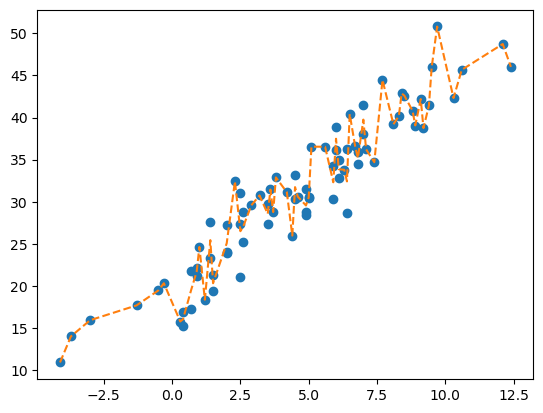

In [4]:
plt.plot(X,y,'o')
plt.plot(X,yhat,'--')

# 수동구현

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# 데이터를 준비합니다. X_train, y_train, X_test, y_test는 이미 준비된 데이터셋으로 가정합니다.
# 예시로 임의의 데이터를 사용할 수 있습니다.
X_train, y_train = np.random.rand(100, 5), np.random.rand(100)
X_test, y_test = np.random.rand(20, 5), np.random.rand(20)

# 초기 예측값을 설정합니다. 보통은 y의 평균값을 사용합니다.
y_pred = np.full(y_train.shape, np.mean(y_train))

# 부스팅 라운드 수를 정의합니다.
num_boosting_rounds = 100

# 부스팅 라운드 수만큼 반복합니다.
for i in range(num_boosting_rounds):
    # 잔차를 계산합니다.
    residuals = y_train - y_pred

    # 새로운 모델을 잔차를 학습 데이터로 사용하여 학습시킵니다.
    model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1)
    model.fit(X_train, residuals)

    # 새로운 예측값을 계산합니다.
    new_pred = model.predict(X_train)

    # 학습된 예측값을 기존 예측값에 더해줍니다.
    y_pred += new_pred

    # 테스트 데이터를 사용하여 현재 모델의 성능을 평가합니다.
    test_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, test_pred, squared=False)
    print(f"Round {i + 1}, Test RMSE: {rmse:.4f}")

# 최종 모델의 성능을 평가합니다.
final_rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Final Test RMSE: {final_rmse:.4f}")